In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()

# # Create a DataFrame for features
wine = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# # Add target column to the DataFrame
wine['target'] = wine_data.target

# # Display the DataFrame
print(wine.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [ ]:
print(wine_data.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


EDA

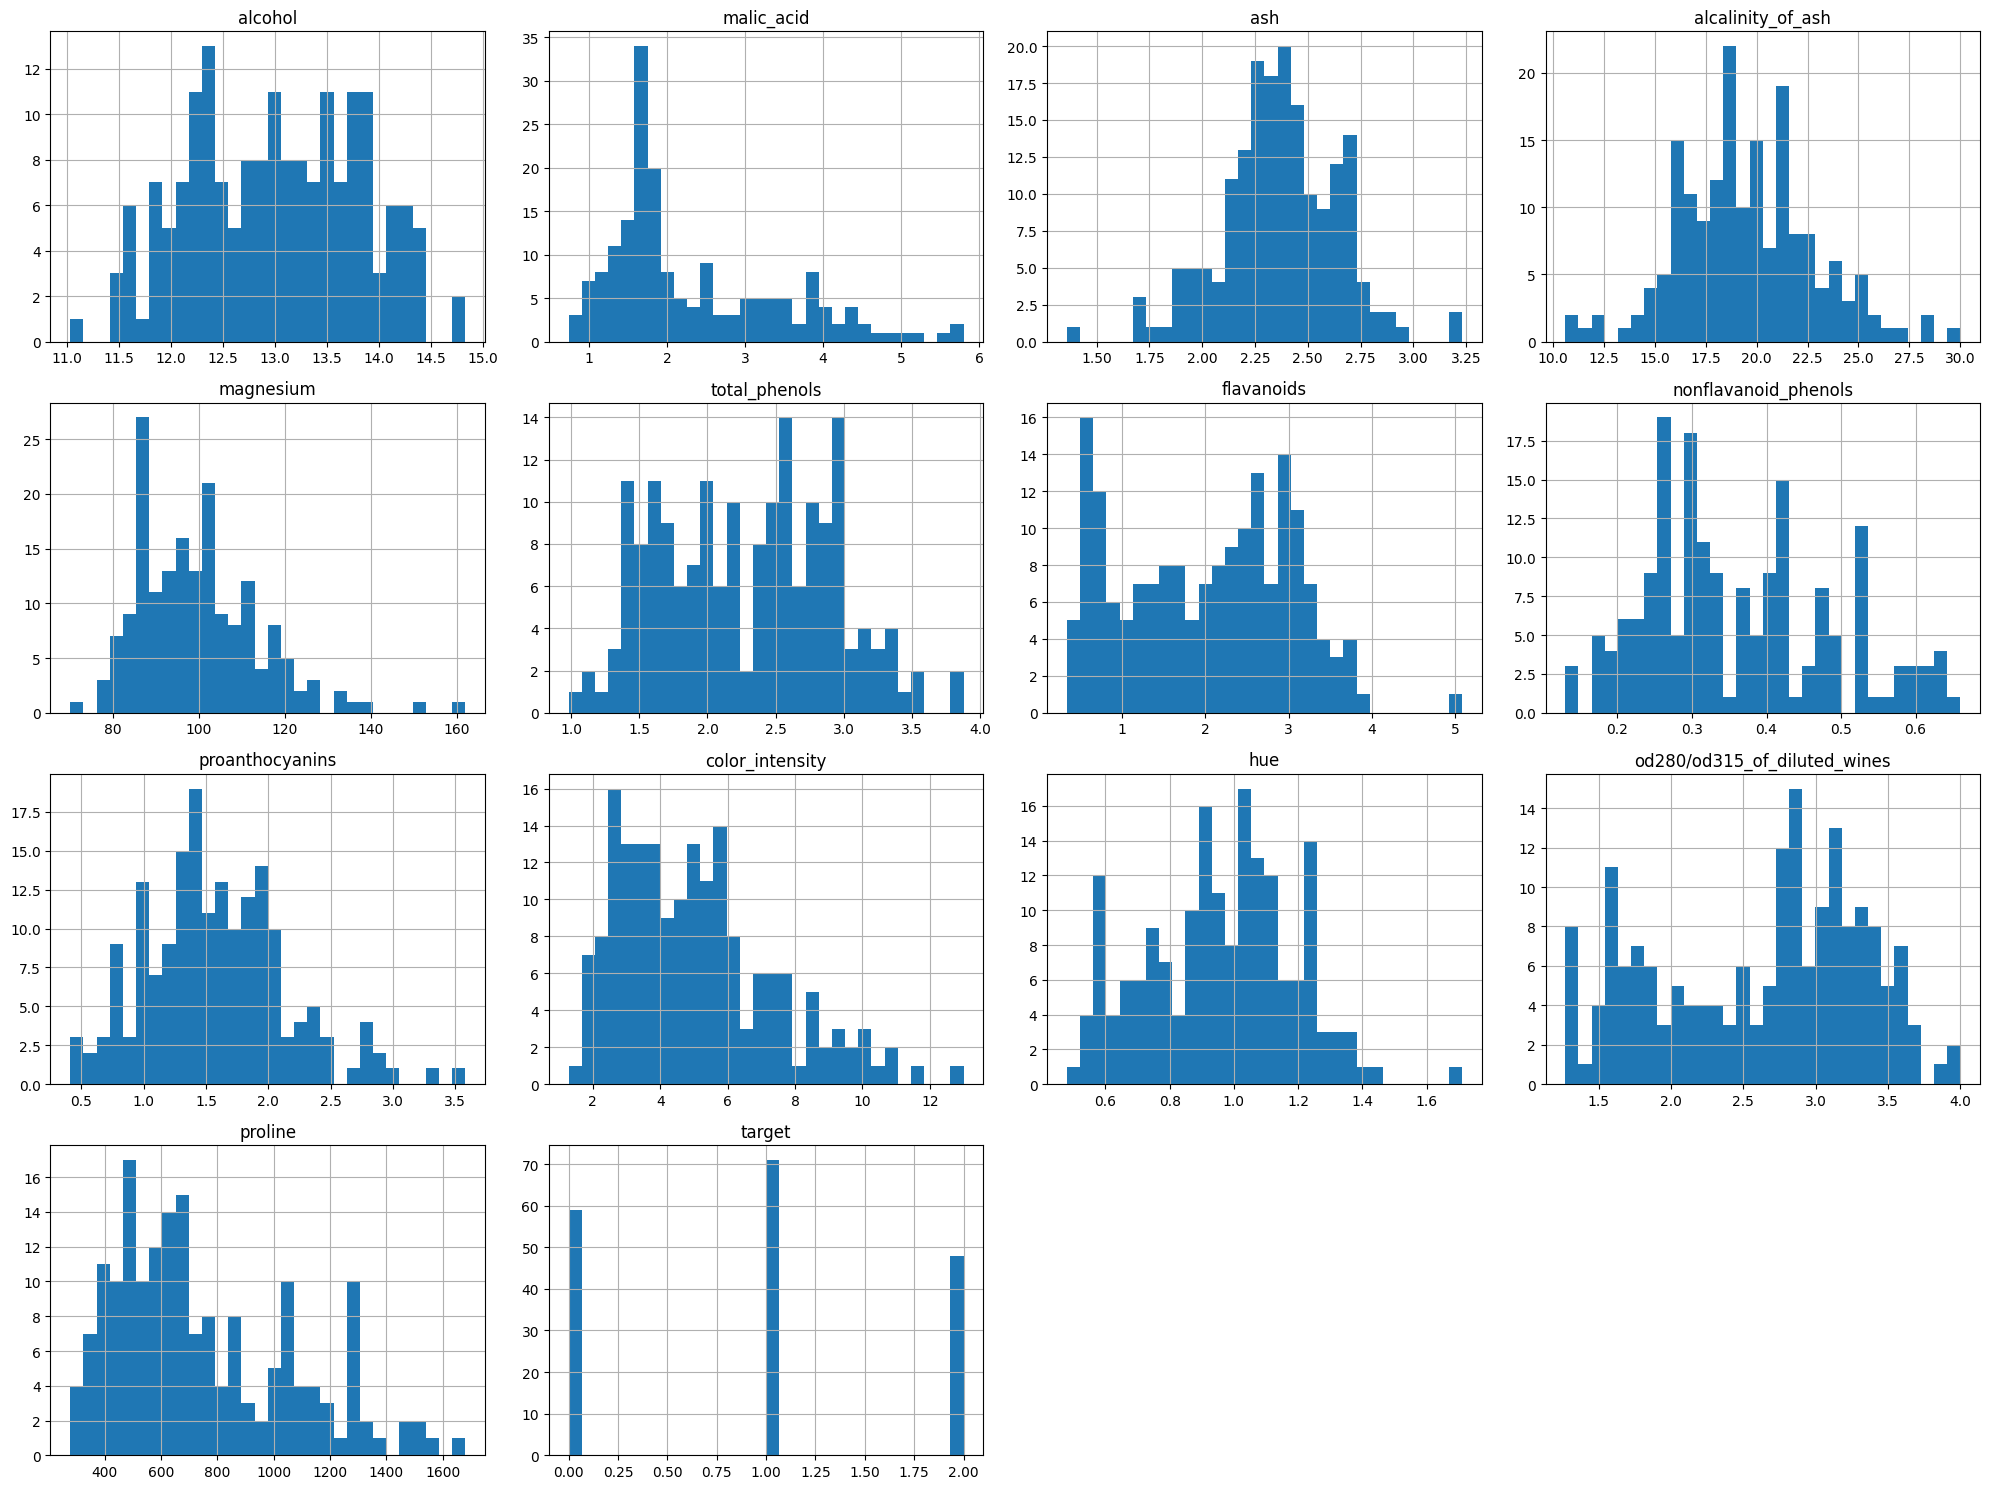

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram for all columns
wine.hist(bins=30, figsize=(20,15))
plt.tight_layout()  # This will provide better spacing between subplots
plt.show()


CHECK CORRELATION SCORE WITH QUALITY COLUMN (AS QUALITY IS THE TARGET)

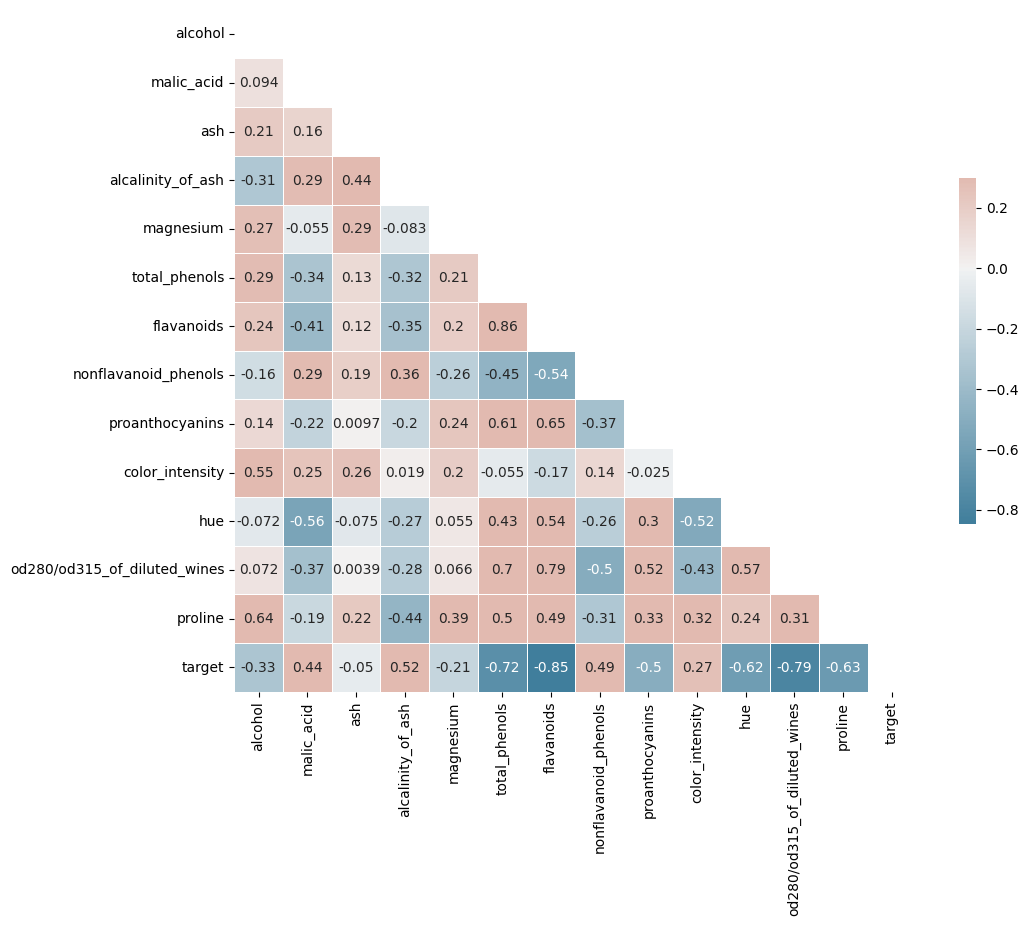

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr = wine.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

RANK OF HIGHEST CORRELATION FEATURES WITH THE TARGET

Correlation scores with 'target':
flavanoids                      0.847498
od280/od315_of_diluted_wines    0.788230
total_phenols                   0.719163
proline                         0.633717
hue                             0.617369
alcalinity_of_ash               0.517859
proanthocyanins                 0.499130
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
alcohol                         0.328222
color_intensity                 0.265668
magnesium                       0.209179
ash                             0.049643
dtype: float64


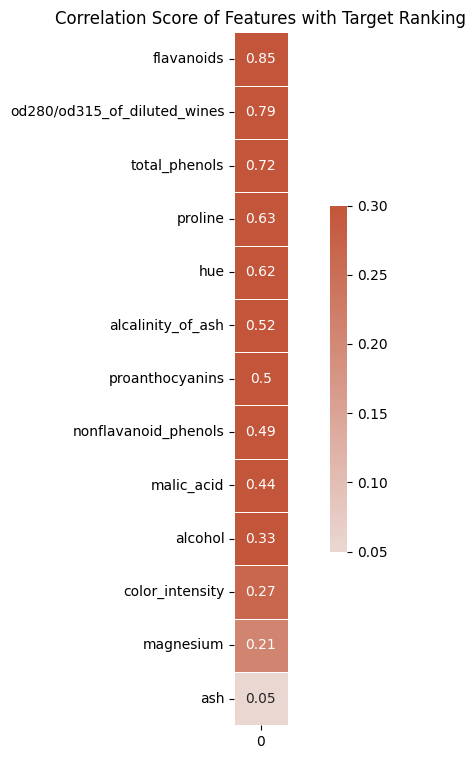

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr = wine.drop(columns=['target']).corrwith(wine['target']).abs().sort_values(ascending=False)

# Print the correlation scores
print("Correlation scores with 'target':")
print(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.to_frame(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Score of Features with Target Ranking')
plt.show()


RENAME THE 'od280/od315_of_diluted_wines' column

In [ ]:
# Rename the column
wine.rename(columns={'od280/od315_of_diluted_wines': 'diluted_wines'}, inplace=True)

# Display the DataFrame with the renamed column
print(wine.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   diluted_wines  proline  target  
0           3.92   1065.0 

SPLIT INTO TRAIN AND TEST SET

In [ ]:
from sklearn.model_selection import train_test_split

X=wine.drop(columns=['target'])
y=wine['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (142, 13)
Shape of X_test: (36, 13)
Shape of y_train: (142,)
Shape of y_test: (36,)


BUILD A PIPELINE

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

def log_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(np.log1p, validate=False),
        StandardScaler())

def default_num_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        StandardScaler())

# Define the preprocessing pipeline
preprocessing = ColumnTransformer([
    ("log", log_pipeline(), ["proline", "malic_acid", "flavanoids"])
], remainder=default_num_pipeline())
wine_prepared = preprocessing.fit_transform(wine)
wine_prepared.shape

(178, 14)

VOTING CLASSIFIER

In [ ]:
# prompt:  Implement a Voting Classifier using a combination of at least three
# different base classifiers available in scikit-learn.

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define the base classifiers
estimators = [
    ("LogisticRegression", LogisticRegression()),
    ("SVM", SVC()),
    ("RandomForestClassifier", RandomForestClassifier()),
]

# Create the VotingClassifier
voting_clf = VotingClassifier(estimators=estimators)

# Fit the model on the training data
voting_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = voting_clf.predict(X_test)

# Evaluate the model accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 1.0


In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

LogisticRegression = 0.9722222222222222
SVM = 0.8055555555555556
RandomForestClassifier = 1.0


STACKING CLASSIFIER

In [ ]:


from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the base classifiers
base_classifiers = [
    ("KNN", KNeighborsClassifier()),
    ("LR", LogisticRegression()),
    ("DT", DecisionTreeClassifier()),
    ("RF", RandomForestClassifier()),
]

# Define the meta-classifier
meta_clf = LogisticRegression()

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_clf)

# Fit the model on the training data
stacking_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = stacking_clf.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

for name, clf in stacking_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 1.0
KNN = 0.7222222222222222
LR = 0.9722222222222222
DT = 0.9444444444444444
RF = 1.0


In [ ]:
for name, clf in stacking_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

KNN = 0.7222222222222222
LR = 0.9722222222222222
DT = 0.9444444444444444
RF = 1.0


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the classification metrics for the Voting Classifier
voting_accuracy = accuracy_score(y_test, voting_clf.predict(X_test))
voting_precision = precision_score(y_test, voting_clf.predict(X_test), average="macro")
voting_recall = recall_score(y_test, voting_clf.predict(X_test), average="macro")
voting_f1 = f1_score(y_test, voting_clf.predict(X_test), average="macro")

# Calculate the classification metrics for the Stacking Classifier
stacking_accuracy = accuracy_score(y_test, stacking_clf.predict(X_test))
stacking_precision = precision_score(y_test, stacking_clf.predict(X_test), average="macro")
stacking_recall = recall_score(y_test, stacking_clf.predict(X_test), average="macro")
stacking_f1 = f1_score(y_test, stacking_clf.predict(X_test), average="macro")

# Print the results
print("Voting Classifier:")
print("- Accuracy:", voting_accuracy)
print("- Precision:", voting_precision)
print("- Recall:", voting_recall)
print("- F1 Score:", voting_f1)

print("\nStacking Classifier:")
print("- Accuracy:", stacking_accuracy)
print("- Precision:", stacking_precision)
print("- Recall:", stacking_recall)
print("- F1 Score:", stacking_f1)


Voting Classifier:
- Accuracy: 1.0
- Precision: 1.0
- Recall: 1.0
- F1 Score: 1.0

Stacking Classifier:
- Accuracy: 1.0
- Precision: 1.0
- Recall: 1.0
- F1 Score: 1.0


Everything is at 100% score which is unlikely to reflect real world scenario This could happen as the data is to minimal or lack of variation that makes the model perform at this accuracy, but in the real world there supposed to be more variation and noise in the data